In [1]:
# Load model directly
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer

torch.manual_seed(17)

device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-small", use_fast=True, 
                                          add_prefix_space=True)
model = AutoModelForCausalLM.from_pretrained("prajjwal1/bert-small", return_dict_in_generate=True, 
                                             pad_token_id=tokenizer.eos_token_id).to(device)

/home/yoni/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


In [2]:
from automata_examples.man_woman_dfa import get_man_woman_automaton

automaton = get_man_woman_automaton()
automaton.alphabet.symbols


frozenset({The,
           art,
           engineering,
           man,
           maths,
           medicine,
           music,
           science,
           studied,
           woman})

In [3]:
from model_wrapper.bert_small_wrapper import BertSmallWrapper
from llm_automaton.llm_automaton_builder import LLMAutomatonBuilder

wrapper = BertSmallWrapper(model, tokenizer, device)
builder = LLMAutomatonBuilder()

In [4]:
from pythautomata.model_exporters.dot_exporters.wfa_dot_exporting_strategy import WFADotExportingStrategy

llm_automaton = builder.construct_llm_automaton(automaton, wrapper)

dot_exporter = WFADotExportingStrategy()
dot_exporter.export(llm_automaton, "llm_automaton_BERT.dot")

tensor([[ 101, 1996,  102]])
torch.Size([1, 3, 30522])
man
<class 'pythautomata.base_types.symbol.SymbolStr'>
{'input_ids': tensor([[ 101, 2158,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}
tensor([[ 101, 2158,  102]])
[[101, 2158, 102]]
[[2158]]
[2158]
woman
<class 'pythautomata.base_types.symbol.SymbolStr'>
{'input_ids': tensor([[ 101, 2450,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}
tensor([[ 101, 2450,  102]])
[[101, 2450, 102]]
[[2450]]
[2450]
{'man': 0.6612929049215732, 'woman': 0.3387070950784268}
tensor([[ 101, 1996, 2158, 3273,  102]])
torch.Size([1, 5, 30522])
medicine
<class 'pythautomata.base_types.symbol.SymbolStr'>
{'input_ids': tensor([[ 101, 4200,  102]]), 'token_type_ids': tensor([[0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1]])}
tensor([[ 101, 4200,  102]])
[[101, 4200, 102]]
[[4200]]
[4200]
science
<class 'pythautomata.base_types.symbol.SymbolStr'>
{'input_ids': tensor([[ 101, 267

In [7]:
from llm_automaton.llm_automaton_sampler import LLMAutomatonSampler

sampler = LLMAutomatonSampler(llm_automaton)

samples = sampler.sample(100000)
samples

[[The, man, studied, science],
 [The, man, studied, art],
 [The, man, studied, science],
 [The, woman, studied, art],
 [The, man, studied, art],
 [The, man, studied, engineering],
 [The, woman, studied, art],
 [The, man, studied, maths],
 [The, man, studied, art],
 [The, man, studied, art],
 [The, woman, studied, art],
 [The, man, studied, art],
 [The, man, studied, maths],
 [The, man, studied, art],
 [The, man, studied, art],
 [The, woman, studied, maths],
 [The, man, studied, art],
 [The, woman, studied, music],
 [The, man, studied, art],
 [The, man, studied, art],
 [The, man, studied, music],
 [The, woman, studied, maths],
 [The, woman, studied, art],
 [The, man, studied, music],
 [The, woman, studied, art],
 [The, man, studied, art],
 [The, man, studied, art],
 [The, man, studied, music],
 [The, woman, studied, art],
 [The, man, studied, maths],
 [The, man, studied, music],
 [The, man, studied, maths],
 [The, man, studied, music],
 [The, man, studied, art],
 [The, woman, studied, m

In [8]:
import pandas as pd
from collections import defaultdict
from pythautomata.base_types.symbol import SymbolStr

occurrences = defaultdict(int)
total_occurrences = 100000  # Definir el total de ocurrencias

for match in samples:
    words = match
    gender = None
    profession = None
    for word in words:
        if word == SymbolStr('man') or word == SymbolStr('woman'):
            # occurrences[word] += 1
            gender = word
        elif word in [SymbolStr('medicine'), SymbolStr('science'), SymbolStr('maths'),
                        SymbolStr('art'), SymbolStr('engineering'), SymbolStr('music')]:  # Agrega más profesiones si es necesario
            profession = word
    if gender and profession:
        occurrences[f'{gender} | {profession}'] += 1

percentages = {key: (value / total_occurrences) * 100 for key, value in occurrences.items()}


for key, value in percentages.items():
    print(f'{key}: {value:.2f}%')

man | science: 4.72%
man | art: 43.00%
woman | art: 20.05%
man | engineering: 1.22%
man | maths: 7.21%
woman | maths: 3.44%
woman | music: 6.11%
man | music: 8.29%
woman | engineering: 0.77%
woman | science: 2.54%
man | medicine: 1.58%
woman | medicine: 1.06%


In [9]:
# Create a dataframe with the results

df = pd.DataFrame(sorted(percentages.items()), columns=['Profession', 'Percentage'])
df

,Profession,Percentage
0,man | art,43.004
1,man | engineering,1.221
2,man | maths,7.205
3,man | medicine,1.576
4,man | music,8.292
5,man | science,4.719
6,woman | art,20.055
7,woman | engineering,0.770
8,woman | maths,3.438
9,woman | medicine,1.065


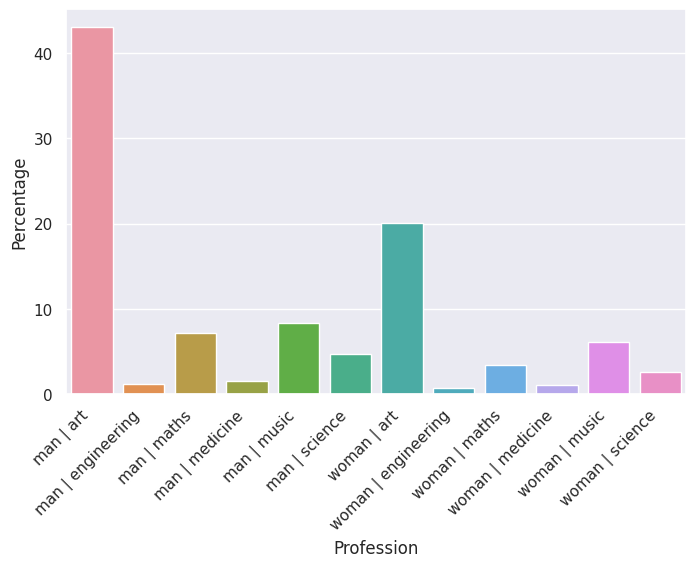

In [10]:
# Plot the results

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.barplot(x="Profession", y="Percentage", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


In [11]:
occurrences = defaultdict(int)
total_occurrences = 100000  # Definir el total de ocurrencias

woman_ocurrences = defaultdict(int)
woman_count = 0
man_ocurrences = defaultdict(int)
man_count = 0

for match in samples:
    words = match
    gender = None
    profession = None
    for word in words:
        if word == SymbolStr('man') or word == SymbolStr('woman'):
            # occurrences[word] += 1
            gender = word
        elif word in [SymbolStr('medicine'), SymbolStr('science'), SymbolStr('maths'),
                        SymbolStr('art'), SymbolStr('engineering'), SymbolStr('music')]:  # Agrega más profesiones si es necesario
            profession = word
    if gender and profession:
        if gender == SymbolStr('man'):
            man_count += 1
            man_ocurrences[profession] += 1
        else:
            woman_count += 1
            woman_ocurrences[profession] += 1

man_percentages = {key: (value / man_count) * 100 for key, value in man_ocurrences.items()}
woman_percentages = {key: (value / woman_count) * 100 for key, value in woman_ocurrences.items()}



/tmp/ipykernel_16504/2386631928.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


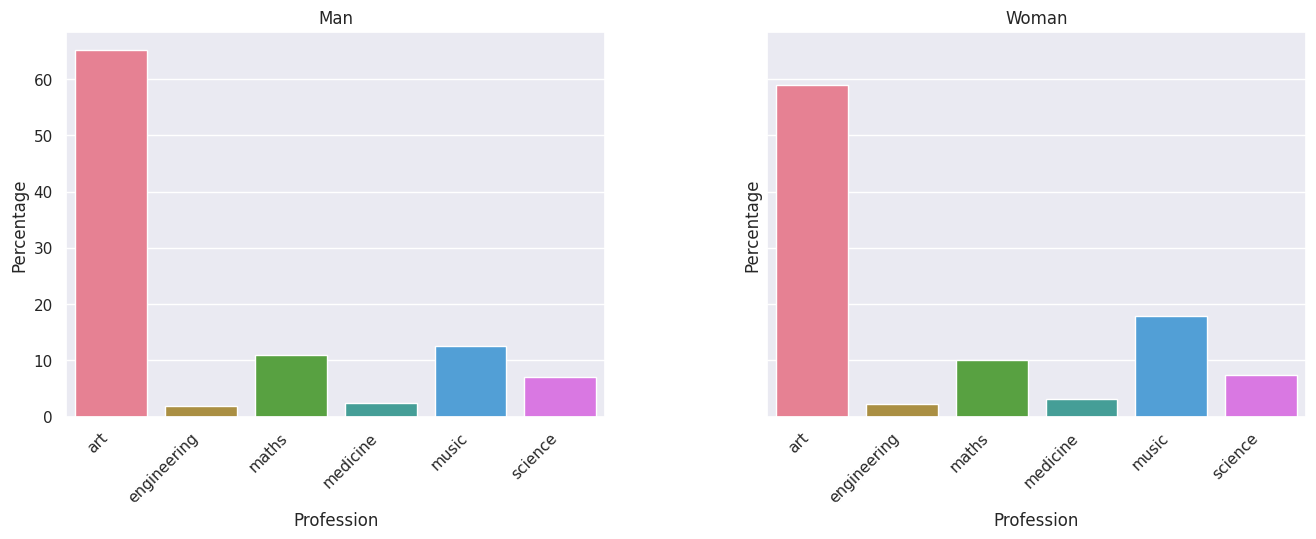

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming man_percentages and woman_percentages are dictionaries with the same keys (professions) and values (percentages)

# Sort dataframes based on the 'Profession' column
man_df = pd.DataFrame(sorted(man_percentages.items()), columns=['Profession', 'Percentage'])
woman_df = pd.DataFrame(sorted(woman_percentages.items()), columns=['Profession', 'Percentage'])

# Set a custom color palette
colors = sns.color_palette("husl", n_colors=len(man_df))

# Create subplots with spacing
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True, gridspec_kw={'wspace': 0.3})

# Plot for Man
sns.set_theme(style="whitegrid")
sns.barplot(x="Profession", y="Percentage", data=man_df, palette=colors, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[0].set_title("Man")

# Plot for Woman
sns.set_theme(style="whitegrid")
sns.barplot(x="Profession", y="Percentage", data=woman_df, palette=colors, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[1].set_title("Woman")

# Adjust layout
plt.tight_layout()
plt.show()
